## Instrucciones

* Por favor responder en este mismo notebook




Considere el dataset wine (un clásico parecido a iris)

In [1]:
from sklearn.datasets import load_wine
wine_dataset = load_wine()
print(wine_dataset.keys())
print(wine_dataset['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:     

In [2]:
# Librerías utilizadas

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy.stats import uniform
import matplotlib.pyplot as plt

## Pregunta 1
Realice una partición aleatoria para generar un conjunto de entrenamiento, validación, y prueba. Utilice un enfoque de Grid Search para encontrar el valor de k más apropiado para un clasificador knn. Para el valor de k encontrado, evalúe en el conjunto de prueba, entregando la matriz de confusión, accuracy, precision, recall, y F1-score. Para qué tipo de vino (clase), el clasificador tiene más problemas para clasificar, justifique su respuesta. 

### Respuesta:

In [4]:
# Cargamos la data a utilizar
X, y = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names), pd.DataFrame(data=wine_dataset.target, 
                                                                                              columns=["wine_quality_type"])

# Matriz de atributos                                                                                               
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
# Vector objetivo
y.head()

,wine_quality_type
0,0
1,0
2,0
3,0
4,0


In [6]:
# Partición aleatoria para generar un conjunto de entrenamiento, validación, y prueba

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

In [7]:
# Utilizamos un enfoque de Grid Search para encontrar el valor de k

k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', verbose = 0).fit(X_train, y_train)

In [8]:
print("El valor de k corresponde a:", grid.best_params_)

El valor de k corresponde a: {'n_neighbors': 30}


In [9]:
# Predicciones en el conjunto de prueba
knn_y_hat = grid.best_estimator_.predict(X_test)

In [10]:
# Matriz de confusión
print(confusion_matrix(y_test, knn_y_hat))

[[15  0  1]
 [ 0 15  6]
 [ 0  3  5]]


In [11]:
# Medición de accuracy
print("El valor de la métrica de accuracy es:", accuracy_score(y_test, knn_y_hat).round(2))

El valor de la métrica de accuracy es: 0.78


In [12]:
# Reporte de las métricas prescision, recall y f1-score

print(classification_report(y_test, knn_y_hat))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.83      0.71      0.77        21
           2       0.42      0.62      0.50         8

    accuracy                           0.78        45
   macro avg       0.75      0.76      0.75        45
weighted avg       0.82      0.78      0.79        45



**Comentarios:**
    
1. El el clasificador tiene más problemas para clasificar al vino de la clase número 2, dado que sus métricas de precision, recall y f1-score son menores a 70%.

## Pregunta 2
Considere como conjunto de entrenamiento el conjunto de entrenamiento + validación de la pregunta 1. Para un clasificador knn grafique en un mismo plot el accuracy de entrenamiento y el accuracy en el conjunto de prueba a medida que aumenta el valor de k (ver el ejemplo de la clase 1 con el dataset breast_cancer). En base al resultado del gráfico, cuál es el valor de k más apropiado? Justifique su respuesta. Coincide con el resultado obtenido en la pregunta 1?

### Respuesta:

In [13]:
# Conjunto de entrenamiento + validación

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

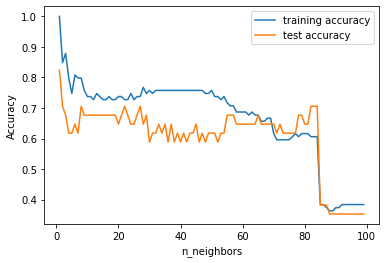

In [14]:
training_accuracy = []
test_accuracy = []
k_range = range(1, 100)

for n_neighbors in k_range:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training and test set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_valid, y_valid))
    
plt.plot(k_range, training_accuracy, label="training accuracy")
plt.plot(k_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
_ = plt.legend()

**Comentarios:**

1. Podemos apreciar que para n_neighbors = 30 el valor de accuracy se estabiliza en el conjunto de entrenamiento y disminuye a medida que aumentamos el valor de n_neighbors. El resultado concuerda con lo realizado en la pregunta número 1 

## Pregunta 3
Usando la partición de la pregunta 1, entrene una regresión logística con regularización L1. Usando Random Search, determine el valor del hiperparámetro C. Para el valor de C seleccionado, qué atributos quedan ponderados por pesos igual a 0. Evalúe en el conjunto de prueba, entregando la matriz de confusión, accuracy, precision, recall, y F1-score. En base al resultado de accuracy, cuál clasificador (knn o regresión logística) obtiene el mejor resultado.

### Respuesta:

In [15]:
# Partición aleatoria para generar un conjunto de entrenamiento, validación, y prueba

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

In [16]:
# Valores posibles para C

distributions = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [17]:
# Utilización de RandomizedSearchCV para encontrar el valor de C

model_logreg = RandomizedSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), 
                                  distributions, random_state=0).fit(X_train, y_train)

In [18]:
# Mejor parámetro

print("El mejor valor para el parámetro es", model_logreg.best_params_)

El mejor valor para el parámetro es {'C': 1}


In [19]:
# Implementación del modelo de regresión logística con penalización L1 y el mejor parámetro

best_model_reg = LogisticRegression(penalty='l1', solver='liblinear', 
                                    C=100, random_state=0).fit(X_train, y_train)                     

In [20]:
# Coeficientes del modelo

best_model_reg.coef_

array([[-5.98974573e-01,  4.64773515e+00,  0.00000000e+00,
        -3.18442140e+00, -1.69527232e-01,  0.00000000e+00,
         9.54263147e+00,  0.00000000e+00,  0.00000000e+00,
         2.43384115e-02,  0.00000000e+00,  0.00000000e+00,
         6.29102819e-02],
       [ 7.59252773e-01, -2.10150000e+00, -4.03928816e+00,
         7.53580267e-01, -4.29742251e-02, -1.96696469e-01,
         0.00000000e+00,  0.00000000e+00,  7.56032194e+00,
        -5.78415544e+00,  8.31358673e+00,  5.07569183e-02,
        -2.67335266e-02],
       [-9.96776720e-02,  9.40449963e-01,  0.00000000e+00,
         1.58403361e-01,  5.27386811e-02,  0.00000000e+00,
        -5.91842267e+00,  0.00000000e+00, -1.87875364e+00,
         3.91050233e+00,  0.00000000e+00, -7.67134735e+00,
        -2.87962961e-03]])

1. Para la clase 0 los atributos con peso 0 son: Ash, Total phenols, Nonflavanoid phenols, Proanthocyanins, Hue, OD280/OD315 of diluted wines.

2. Para la clase 0 los atributos con peso 0 son: Flavanoids, Nonflavanoid phenols.

3. Para la clase 0 los atributos con peso 0 son: Ash, Total phenols, Nonflavanoid phenols, Hue.

In [21]:
# Predicciones
y_hat = best_model_reg.predict(X_test)

In [22]:
# Matriz de confusión
print(confusion_matrix(y_test, y_hat))

[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


In [23]:
# Valor métrica de accuracy
accuracy_score(y_test, y_hat).round(2)

0.93

In [24]:
# Valor métricas de precision, recall y f1-score
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.91      0.95      0.93        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



**Comentarios**

1. En base al resultado de accuracy, elclasificador de regresión logística obtiene el mejor resultado.

## Pregunta 4
Repita la pregunta 3 con regularización L2

### Respuesta

In [25]:
# Partición aleatoria para generar un conjunto de entrenamiento, validación, y prueba

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

In [26]:
# Valores posibles para C

distributions = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [27]:
# Utilización de RandomizedSearchCV para encontrar el valor de C

model_logregl2 = RandomizedSearchCV(LogisticRegression(), 
                                  distributions, random_state=0).fit(X_train, y_train)

In [28]:
# Mejor parámetro

print("El mejor valor para el parámetro es", model_logregl2.best_params_)

El mejor valor para el parámetro es {'C': 1}


In [29]:
# Implementación del modelo de regresión logística con penalización L2 y el mejor parámetro

best_model_regl2 = LogisticRegression(C=1, random_state=0).fit(X_train, y_train)

In [30]:
# Coeficientes del modelo

best_model_regl2.coef_

array([[ 2.03244220e-01,  4.06265286e-01,  9.54558589e-02,
        -5.50063433e-01, -5.19718573e-02,  2.00084522e-01,
         4.44806552e-01, -1.96501628e-02,  9.65706538e-02,
         2.71028896e-01, -1.02952238e-02,  3.39397206e-01,
         1.12730016e-02],
       [ 2.18542118e-01, -7.33360068e-01, -9.52773090e-02,
         3.17650948e-01,  1.54523733e-02,  1.82525599e-01,
         3.37431604e-01, -2.19110420e-03,  2.44331619e-01,
        -1.21370050e+00,  2.30867796e-01,  4.22320695e-01,
        -7.35472797e-03],
       [-4.21786338e-01,  3.27094782e-01, -1.78549899e-04,
         2.32412485e-01,  3.65194839e-02, -3.82610121e-01,
        -7.82238157e-01,  2.18412670e-02, -3.40902272e-01,
         9.42671605e-01, -2.20572572e-01, -7.61717901e-01,
        -3.91827359e-03]])

In [31]:
# Predicciones 

y_hat = best_model_regl2.predict(X_test)

In [32]:
# Matriz de confusión

print(confusion_matrix(y_test, y_hat))

[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


In [33]:
# Valor métrica accuracy

accuracy_score(y_test, y_hat).round(2)

0.93

In [34]:
# Reporte métrica precision, recall y f1-score

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.91      0.95      0.93        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



**Comentarios:**
    
1. El modelo de regresión logítica con penalización L2 tiene el mismo desempeño que el modelo con penalización L1

## Pregunta 5 
Considere el clasificador Linear Support Vector Machine. Utilizando el dataset completo, realice una validación cruzada de 10 dobladas estratificada, con SVC (usando valores para los hiperparámetros que trae por defecto) usando como métrica el accuracy. Qué le parece el resultado obtenido? se puede comparar el accuracy obtenido por este enfoque de validación cruzada versus los resultados de accuracy obtenidos por los enfoques hold-out usados para knn, regresión logística L1 y L2? Justifique su respuesta.

### Respuesta

In [42]:
skfold = StratifiedKFold(n_splits=10, shuffle=True)
explicit_accuracy = cross_val_score(SVC(random_state=0), X, y, cv=skfold, scoring="accuracy").round(2)

In [43]:
print("Explicit accuracy scoring: {}".format(explicit_accuracy))

Explicit accuracy scoring: [0.67 0.61 0.72 0.83 0.67 0.61 0.72 0.72 0.88 0.59]


In [47]:
print("Explicit accuracy scoring: {}".format(explicit_accuracy.mean().round(2)))

Explicit accuracy scoring: 0.7


**Comentarios:**
    
1. Los valores de accuracy alcanzan su valor máximo en la validación cruzada considerando el split 9 como test data con un valor de 0.88, siendo en promedio el valor de accuracy de 0.7, que es menor que el obtenido en el modelo KNN y en los modelos de regresión logística implementados

## Pregunta 6
Repita la pregunta 5 pero ahora con Grid-search + cross-validation para determinar el valor de C más apropiado. Mejora el accuracy resultante?

### Respuesta

In [49]:
# Utilización de Grid-search + cross-validation para determinar el valor de C más apropiado

params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
get_params = GridSearchCV(SVC(kernel='rbf', random_state=11238), params, cv=2, return_train_score=True)
get_params.fit(X_train, y_train)
print("El valor de parámetro es:", get_params.best_params_)

El valor de parámetro es: {'C': 100}


In [51]:
# Implementación del modelo con el mejor parámetro
svc_model = SVC(kernel='rbf',  C=100)
svc_model.fit(X_train, y_train)

# Predicción
y_hat = svc_model.predict(X_test)

In [52]:
print(confusion_matrix(y_test, y_hat))

[[15  0  1]
 [ 0 15  6]
 [ 0  1  7]]


In [53]:
accuracy_score(y_test, y_hat).round(2)

0.82

In [54]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.94      0.71      0.81        21
           2       0.50      0.88      0.64         8

    accuracy                           0.82        45
   macro avg       0.81      0.84      0.80        45
weighted avg       0.88      0.82      0.84        45



**Comentarios:**
    
1. Tenemos que el valor de accuracy aumenta con respecto al método empleado anteriormente

## Suerte!